# Objective: 

* Statistical analysis of business data by using descriptive statistics and visualization to understand the data. 

# Data:
**'abtest.csv'** - Various data about the customers in both groups 
1.	user_id - This represents the user ID of the person visiting the website.
2.	group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3.	landing_page - This represents whether the landing page is new or old.
4.	time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5.	converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6.	language_preferred - This represents the language chosen by the user to view the landing page.


### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

### Read the dataset

In [2]:
data = pd.read_csv(r'C:\Users\majan\Downloads\abtest.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
enews=data.copy()

### Understand the shape of the dataset.

In [4]:
enews.shape

(100, 6)

* Dataset has 100 rows and  columns.

### Check the data types of the columns for the dataset.

In [5]:
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
enews = pd.read_csv(r'C:\Users\majan\Downloads\abtest.csv')
pandas_profiling.ProfileReport(enews)

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Fixing the data types
* UserID and Time spent are of interger and float respectively


* group,landing page,language_preffered are of object type, we can change them to categories.
* converted is of object, we change them to bool 

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [7]:
enews["converted"]=enews["converted"].astype("bool")
enews["group"]=enews["group"].astype("category")
enews["landing_page"]=enews["landing_page"].astype("category")
enews["language_preferred"]=enews["language_preferred"].astype("category")

In [8]:
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    bool    
 5   language_preferred      100 non-null    category
dtypes: bool(1), category(3), float64(1), int64(1)
memory usage: 2.4 KB


In [9]:
enews.describe(include=["category","bool"])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,1,3
top,control,new,True,French
freq,50,50,100,34


* French is the most prefered language while the English and Spanish occupy (66)cummulatively
* Control group is uniformly distributed with Treatment as they all have a frequency of 50.
* New and old landing page each occupy a frequency of 50
* There are two unique groups,2 landing pages(old and New) and 3 languages preferred i.e. English, French and Spanish

In [10]:
enews.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Observation .There is a slight  difference on time spent on the page column between the the 3rd qurtile(7.02) and the maximum value(10.71)indicating there could be possibility of outliers to the right in these variables

### Check for missing values

In [11]:
enews.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### EDA(Exploratory Data Analysis)

### Univariate analysis

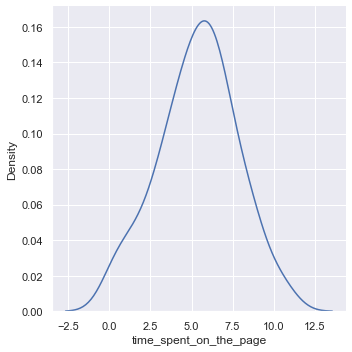

In [12]:
sns.displot(enews['time_spent_on_the_page'],kind="kde")

Observation
* The distribution is normal with estimated 5.3 minutes spent on the the pages

In [13]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

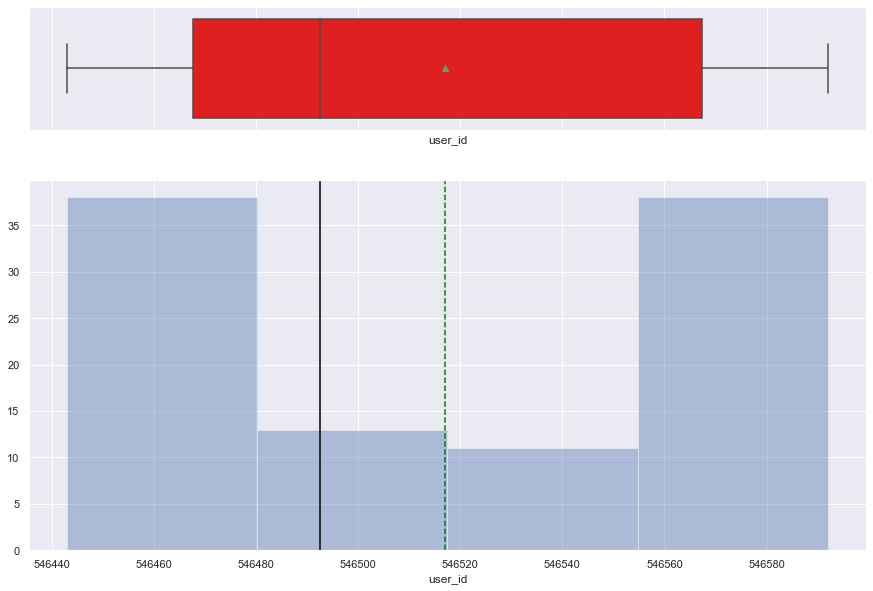

In [14]:
histogram_boxplot(enews["user_id"])

Observation
* User ID has unique values

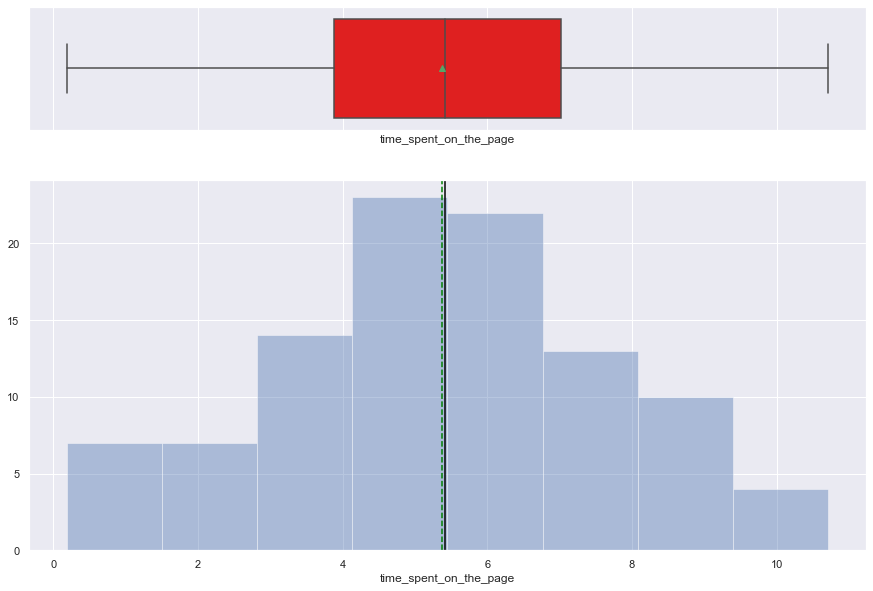

In [15]:
histogram_boxplot(enews["time_spent_on_the_page"])

Observation
The distribution of time spent on the page is normally distributed
There are no outliers in this variable.

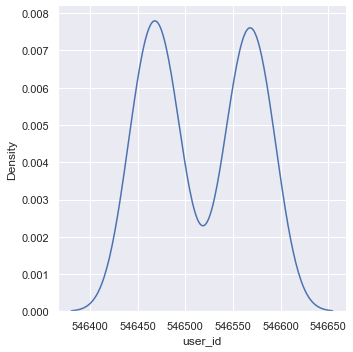

In [16]:
sns.displot(enews['user_id'],kind="kde")

Observation
The mean user_id is 546517

<AxesSubplot:xlabel='user_id', ylabel='Density'>

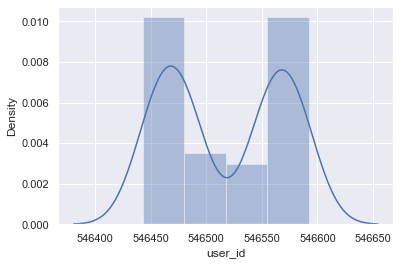

In [17]:
sns.distplot(enews['user_id'])

# Do the users spend more time on the new landing page than the old landing page

### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the time time spent on the new landing page and the old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on landing page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the time spent are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Voila! We can use two sample T-test for this problem.2 Sample Ttest

### Let's find the p-value

In [18]:
from scipy.stats import ttest_ind
landing_page_old=enews[data.landing_page =='old']['time_spent_on_the_page']
landing_page_new=enews[data.landing_page =='new']['time_spent_on_the_page']
# find the p-value
test_stat, p_value = ttest_ind(landing_page_new, landing_page_old, equal_var = True, alternative = 'greater')
print('The p-value is ', p_value)


The p-value is  0.0001316123528095005


### Insight
As the p-value (0.0.0001316123528095005)is much lesser than the level of significance, we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that  users spend more time on the new landing page than the old landing page

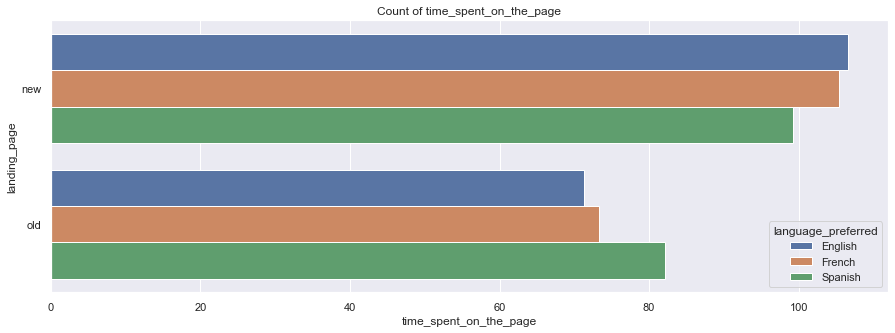

In [19]:
df1= enews['time_spent_on_the_page'].groupby([enews['landing_page'],enews['language_preferred']]).sum()
df2=df1.reset_index().sort_values(by='time_spent_on_the_page',ascending=False)
fig = plt.figure(figsize=(15,5))
plt.title('Count of time_spent_on_the_page')

sns.barplot(df2['time_spent_on_the_page'],df2['landing_page'],hue=df2["language_preferred"]);

Observation
* More time is spent on new landing page than on the old landing page.
* More time is spent on English language in the new landing page as compared to French and Spanish
* Spanish language is the most preferred as more time is spent in the old landing page.
* Less English language is preferred in the old landing page

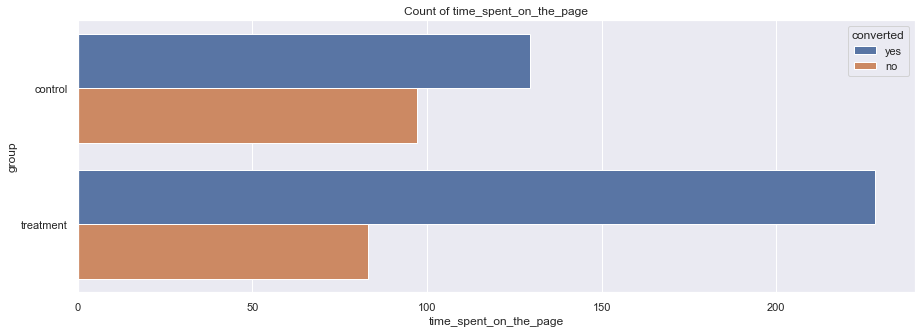

In [20]:
df1= enews['time_spent_on_the_page'].groupby([enews['group'],data['converted']]).sum()
df2=df1.reset_index().sort_values(by='time_spent_on_the_page',ascending=False)
fig = plt.figure(figsize=(15,5))
plt.title('Count of time_spent_on_the_page')

sns.barplot(df2['time_spent_on_the_page'],df2['group'],hue=df2["converted"]);

Observation
* Treatment group spend more time on the landing page than control group.
* Treatment group has the highest conversion to subscribe to the new portal than control group.
* Control group users who were not converted are more than those of treatment group

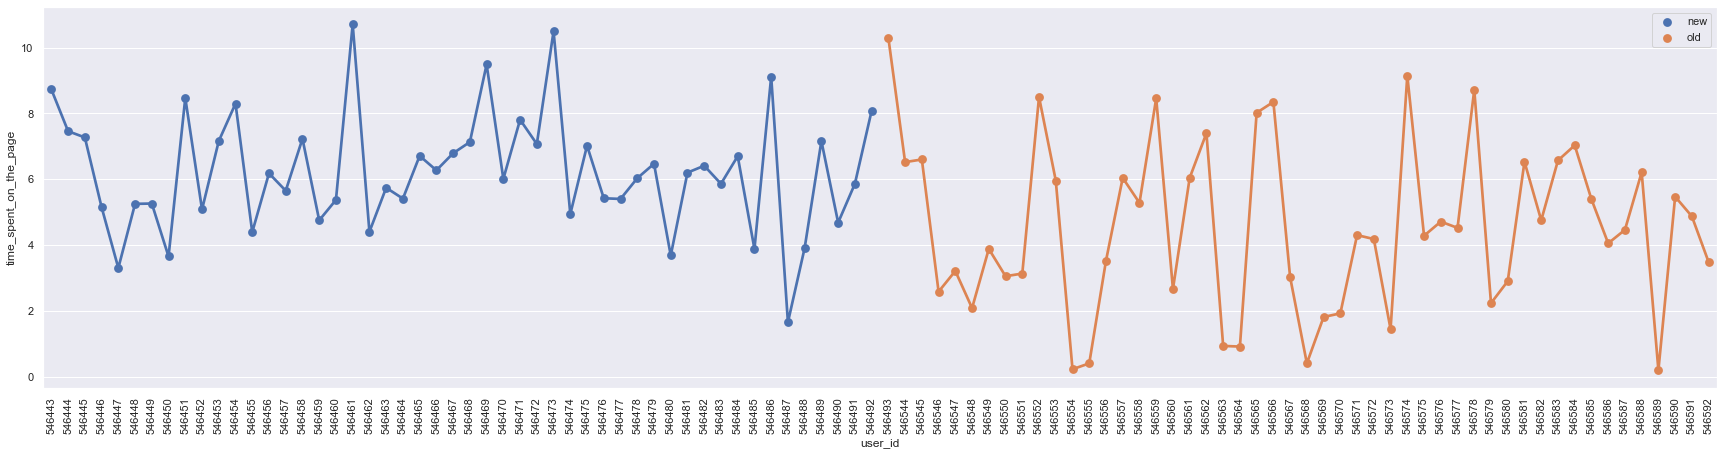

In [21]:
plt.figure(figsize=(30, 7)) 
sns.pointplot(x='user_id', y='time_spent_on_the_page', data=enews, estimator=sum, ci=None, hue = 'landing_page')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) 
plt.show()

Observation
The new and old used_id varies across different times


## Bivariate Analysis

## time_spent_on_the_page vs user_id vs converted

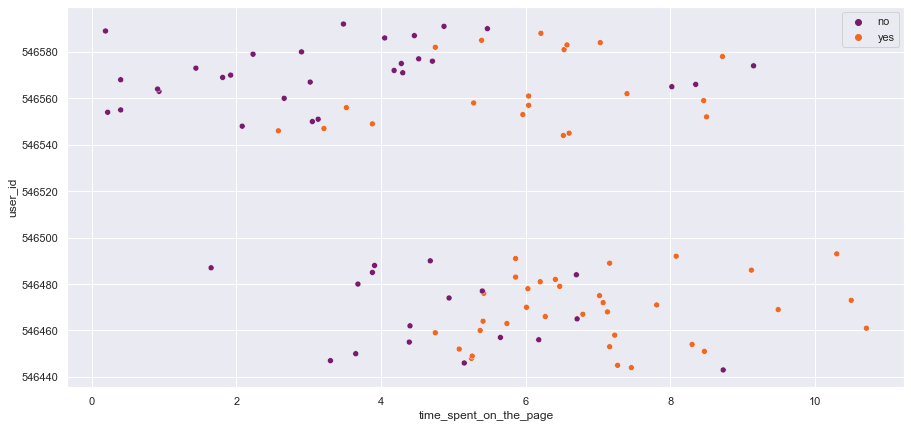

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(enews["time_spent_on_the_page"],enews["user_id"],hue=data["converted"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Observation
* Users spending avobe 10 minutes only 3 users have converted

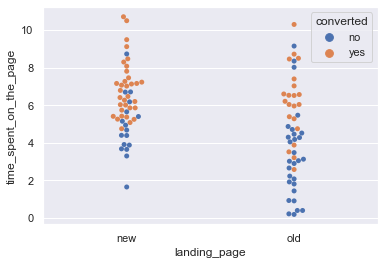

In [23]:
sns.swarmplot(enews['landing_page'], enews['time_spent_on_the_page'],hue=data['converted']);

In [24]:
correlation = data.corr() 
correlation

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


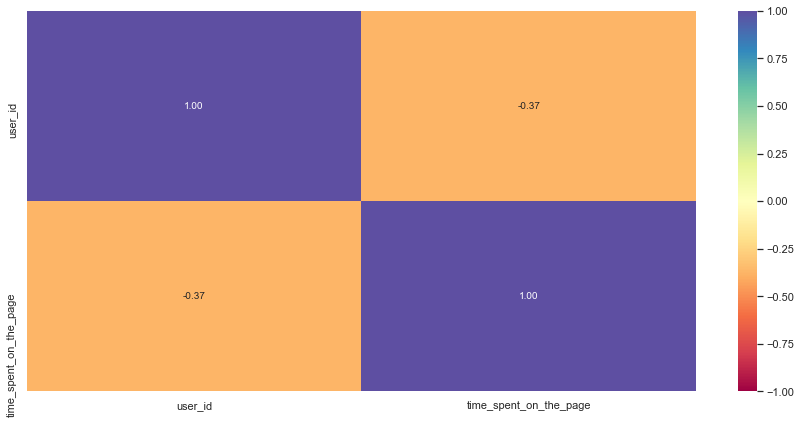

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation
* Time spent on the page is negatively correlated to user_id

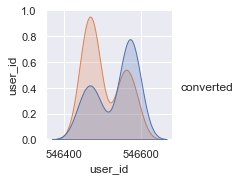

In [26]:
sns.pairplot(data=data.drop(["time_spent_on_the_page"],axis=1),hue="converted")
plt.show()

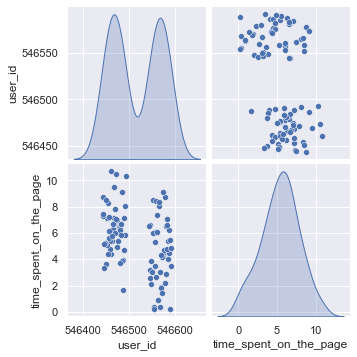

In [27]:
sns.pairplot(data, diag_kind="kde");

## Landing Page vs Time Spent on Page

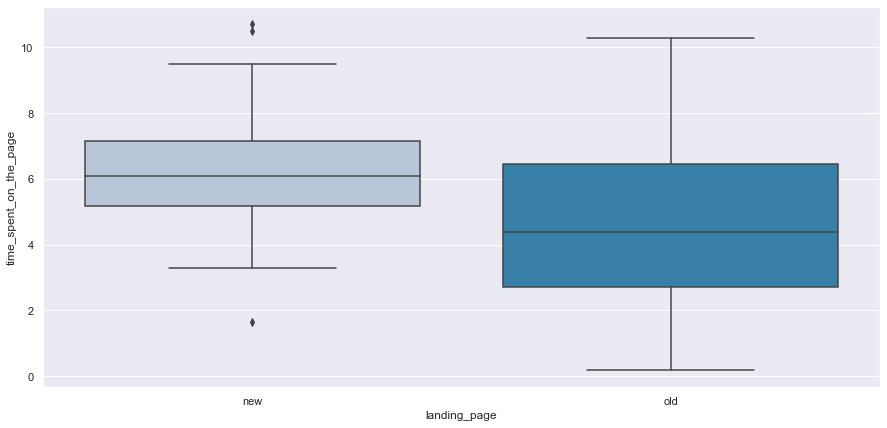

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(enews["landing_page"],enews["time_spent_on_the_page"],palette="PuBu")
plt.show()

Observation
* There are some few outliers on new landing pages and no outliers on old landing page.
* Users spend more time in new landing page than old


## Group vs Time Spent on Page

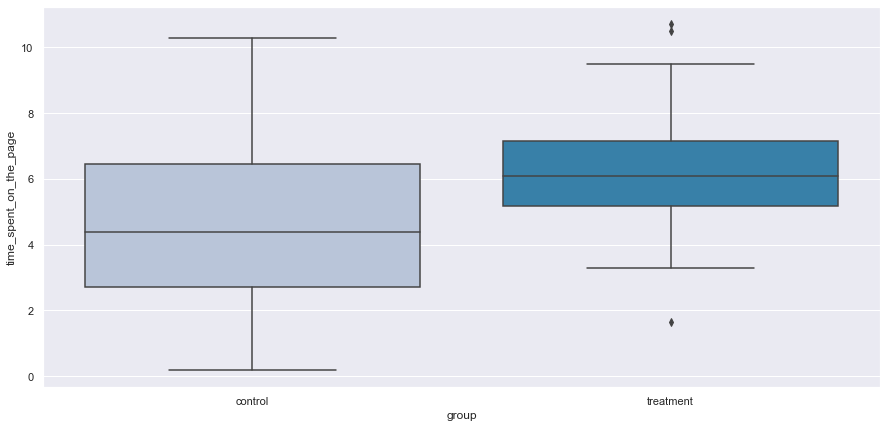

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(enews["group"],enews["time_spent_on_the_page"],palette="PuBu")
plt.show()

Observation
* Treatment group has a higher median value on time spent on the pages than control group.
* Control group has no outliers and tratment group has outliers below the minimum and above the minimum time spent on the page

## Language Preferred vs Time Spent on Page

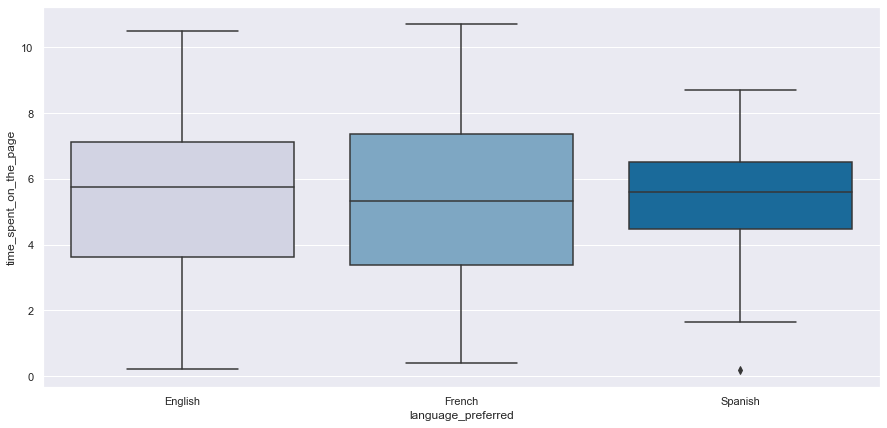

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(enews["language_preferred"],enews["time_spent_on_the_page"],palette="PuBu")
plt.show()

Observation
* French is the most preffered language closely folowed by English the Spanish
* There are a few outliers on Spanish language

## Language Preffered vs User_ID

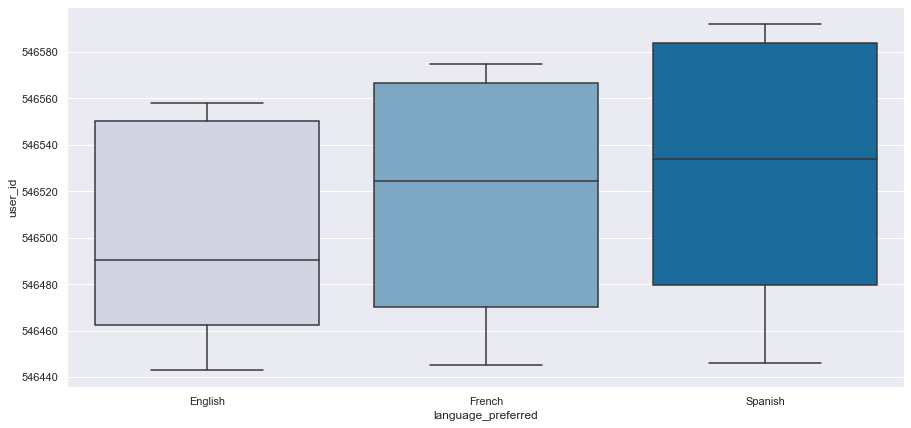

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(enews["language_preferred"],enews["user_id"],palette="PuBu")
plt.show()

## Drawing multi-panel categorical plots

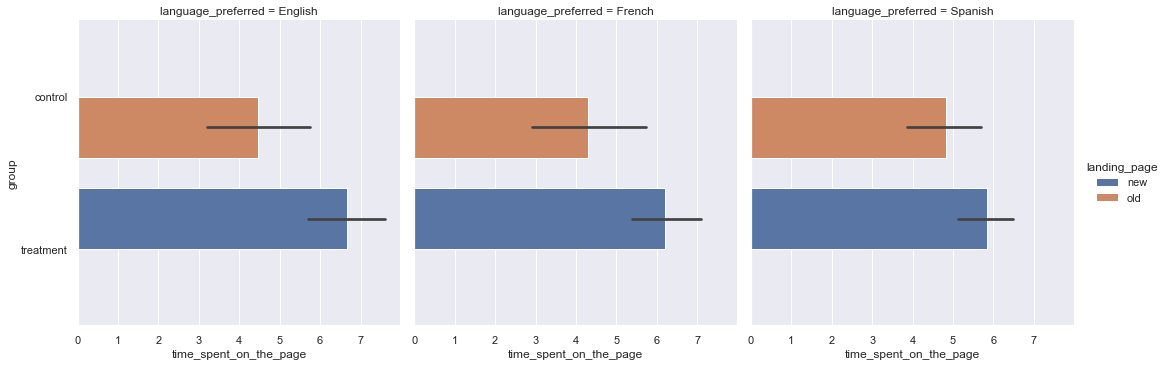

In [32]:
sns.catplot(x="time_spent_on_the_page",
               y = "group",
               hue="landing_page", 
               col="language_preferred", 
               data=enews, 
               kind="bar");

Observation
* Multicategorical analysis of numerical and catergorical variables
* The black line is represented by the Confidence Intervals 

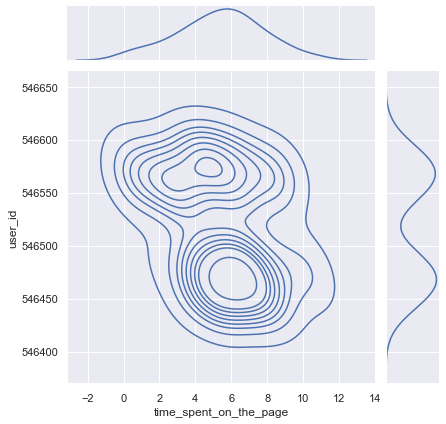

In [43]:
sns.jointplot(enews['time_spent_on_the_page'], enews['user_id'], kind="kde");

# 3.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page 

In [34]:
pd.crosstab(data['converted'],enews['landing_page'])

landing_page,new,old
converted,,
no,17,29
yes,33,21


### Let's write the null and alternative hypothesis

Let $u_1,u_2$ be the proportions of of users who visit the landing page and get converted for new page and old landing page respectively

We  test the null hypothesis

>$H_0:u_1 =u_2$

against the alternate hypothesis

>$H_a:u_1 > u_2$

### Testing whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either converted in new or old landing page
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =20 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =25 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $

In [35]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.9919736917959437


### Insight

As the p-value is less than the significance level 0.05, we reject the null hypothesis. Thus, the manufacturer has enough statistical significance to conclude that the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page

# Does the converted status depend on the preferred language? 

### Let's have a look on the data

In [36]:
cont_table= pd.crosstab(data['converted'],enews['language_preferred'])
cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent on the preferred language.


against the alternate hypothesis

>$H_a:$ Converted status depend on the preferred language.

Test whether the assumptions are satisfied or not
- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Let's find the p-value

In [37]:
from scipy.stats import chi2_contingency
#preparing the contingency table

cont_table= pd.crosstab(data['language_preferred'],enews['converted'])
chi, p_value, dof, expected = chi2_contingency(cont_table)
print('The p-value is ', p_value)

The p-value is  1.0


### Insight
As the p-value is greater than the significance level, we can not  reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that converted status depend on the preferred language at 5% significance level.

# Is the mean time spent on the new page same for the different language users

In [38]:
# get the levels of different language users
enews['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

### The null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of language preferred for French, Spanish and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language preferred is different from the rest.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page same for the different language users follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page same for the different language users does not follows a normal distribution against

In [39]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(enews['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the time variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [40]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( enews['time_spent_on_the_page'][enews['language_preferred']=="English"], 
                                   enews['time_spent_on_the_page'][enews['language_preferred']=="Spanish"], 
                                   enews['time_spent_on_the_page'][enews['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The time spent on page are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


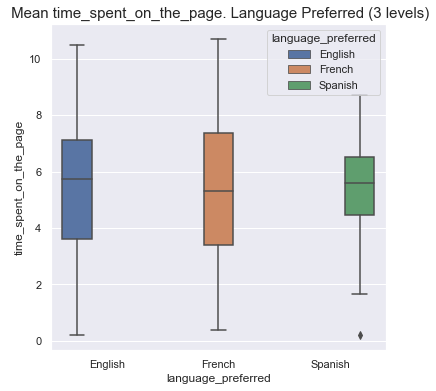

In [41]:
print(enews.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = enews, hue = 'language_preferred')
a.set_title(" Mean time_spent_on_the_page. Language Preferred (3 levels)", fontsize=15)
plt.show()

In [42]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(enews.loc[enews['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              enews.loc[enews['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              enews.loc[enews['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Insight
As the p-value is greater than the significance level(0.05), we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  mean time spent on the new page is the same for the different language users at 5% significance level.


## Conclusion

* Users spend more time on the new landing page than the old landing page
* More time is spent on new landing page than on the old landing page.
* More time is spent on English language in the new landing page as compared to French and Spanish
* Spanish language is the most prefered as more time is spent in the old landing page.
* Less English language is prefered in the old landing page
* Treatment group has a higher median value on time spent on the pages than control group.
* Control group has no outliers and tratment group has outliers below the minimum and above the minimum time spent on the page

### Business Recommendations

* It is intersing that English is the least preferred language. The target market could be reviewed as English is globally more used in the world.
* It would be interesting to have the Age of the different users to know if the subscribers would differ in different target Age groups.
* As we do not have enough statistical significance to conclude that converted status depend on the preferred language at 5% significance level.More customer information can be obtained to see if the above would change like the Genders of the various users.
